###  Machine Learning Internship Task-1

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
data=pd.read_csv(r"C:\Users\Public\Dataset\IRIS.csv")
data

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Getting number of rows and columns
data.shape

(150, 6)

In [6]:
#Getting thRe size of the data
data.size

900

### EDA

In [7]:
#getting the information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.drop(['ID'],axis=1,inplace=True)

In [9]:
#To see the statistics of the dataset such as mean,median, mode and standard deviation
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### no null values are present in the data

In [11]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

##### Each class of species have equalsample and its distributed equally

In [12]:
#Getting the columns of the data set
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
#Checking the correlation 
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


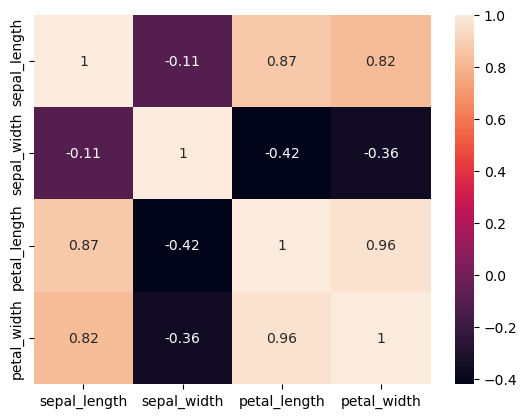

In [14]:
sns.heatmap(data.corr(),annot=True)
plt.show()

##### Petal length and width are positively correlated to each other

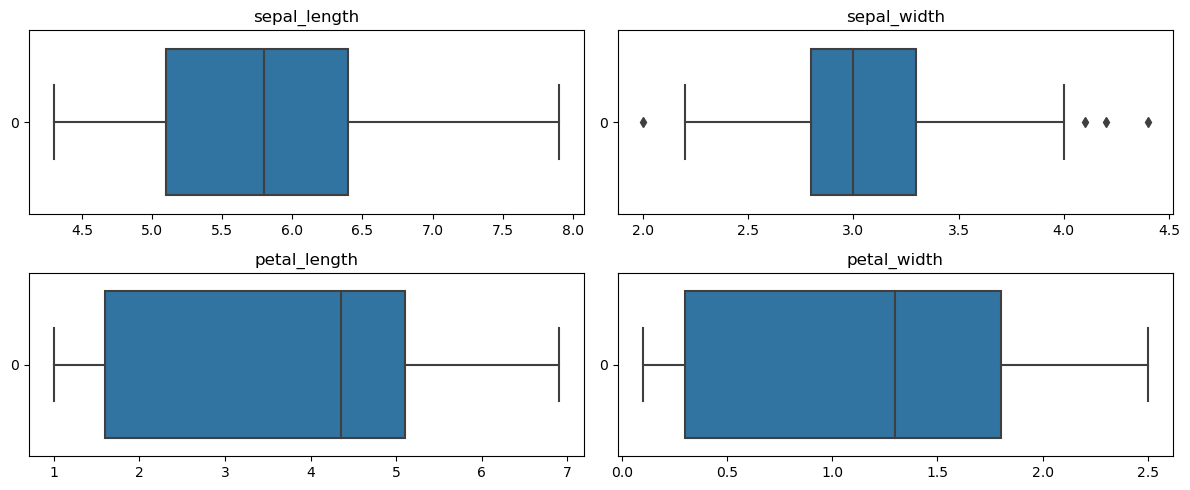

In [15]:
# checking the outliers
col=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=[12,5])

for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[j],orient='h')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(j)
    plt.tight_layout()

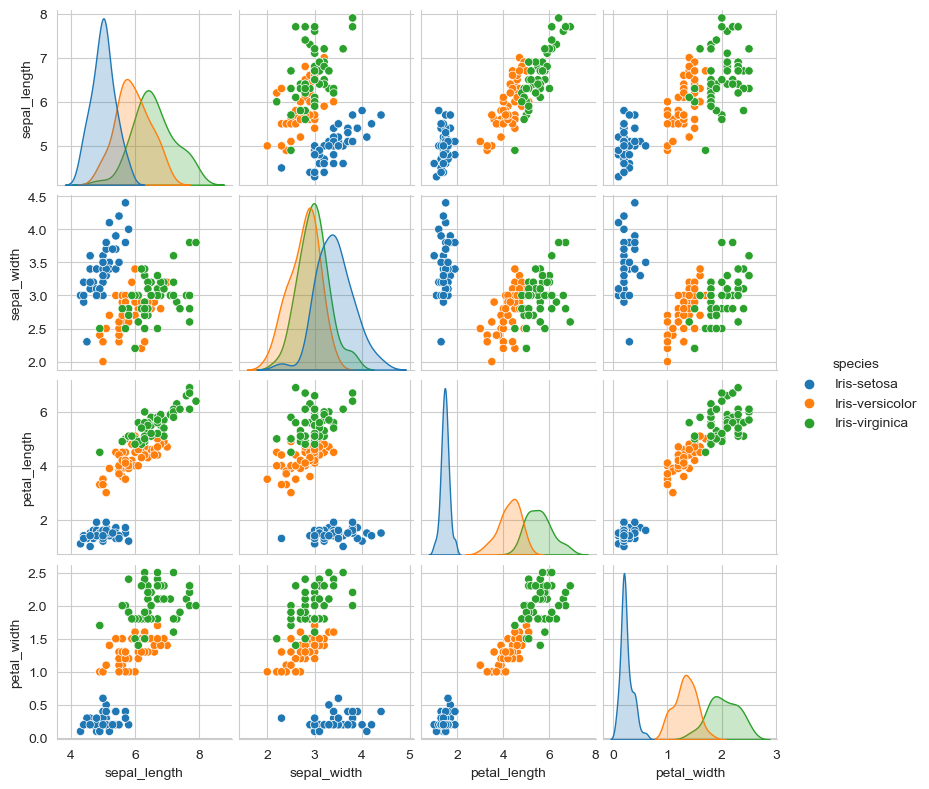

In [16]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="species",size=2);
plt.show()

In [17]:
# K-Means Clustering

In [18]:
x=data.iloc[:,[0,1,2,3]].values

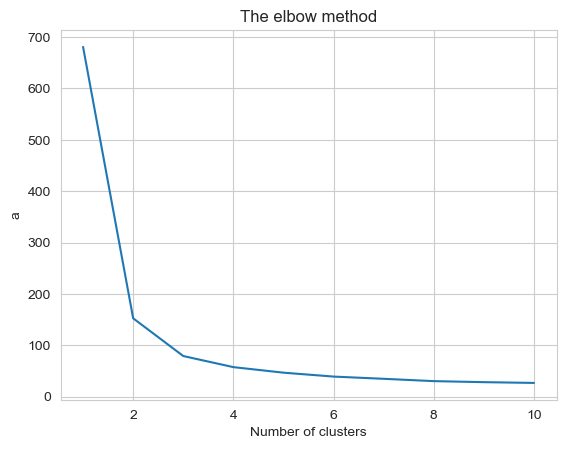

In [19]:
# finding the optimum number of cluster for k-meansclassification using elbow method
from sklearn.cluster import KMeans
a=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    a.append(kmeans.inertia_)
    
#plotting the result on the line graph
plt.plot(range(1,11),a)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('a')
plt.rcParams['figure.figsize']=(10,10)
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This  is when the within cluster sum of squares(a) does not decreases significantly with every iteration. Now that we have the optimum amount of cluster, we can move on to applying K-means clustering to the Iris data.

In [20]:
# Applying K-means to data
kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [21]:
newkmeans=KMeans(n_clusters=3)
y_pred=newkmeans.fit_predict(x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [22]:
newkmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

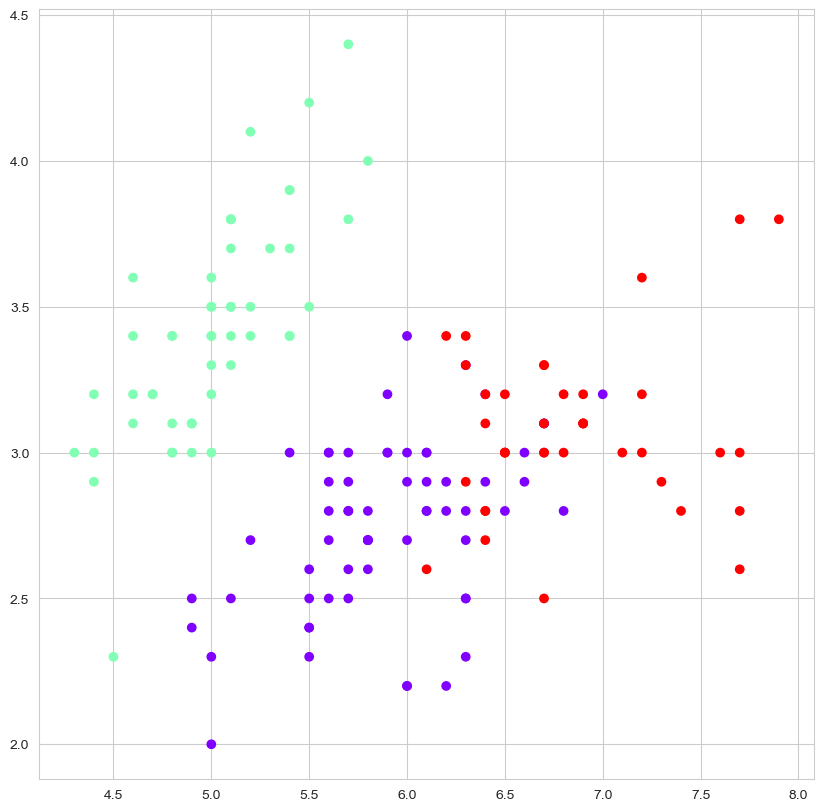

In [23]:
plt.scatter(x[:,0],x[:,1],c=y_pred,cmap='rainbow')

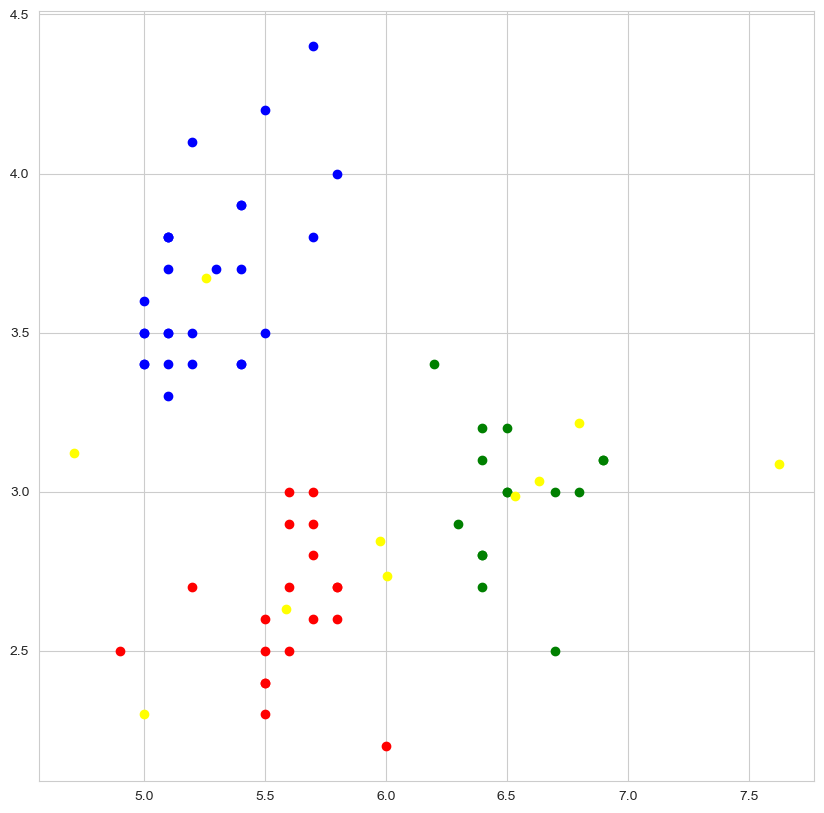

In [24]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],c='red',label='Iris-sentosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c='green',label='Iris-virginica')

#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow',label='Centroid')
plt.show()